In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Leitura do dataset com o monitoramentos do tráfego de dados multimídias de crunchyroll.com
df_midia = pd.read_csv('Captura de tráfego multimidia.csv')
df_midia.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.104,146.75.6.133,TLSv1.2,413,Application Data
1,2,0.000093,192.168.0.104,146.75.6.133,TLSv1.2,100,Application Data
2,3,0.000601,192.168.0.104,146.75.6.133,TLSv1.2,413,Application Data
3,4,0.005155,146.75.6.133,192.168.0.104,TCP,54,443 > 63396 [ACK] Seq=1 Ack=360 Win=424 Len=0
4,5,0.005155,146.75.6.133,192.168.0.104,TCP,54,443 > 63396 [ACK] Seq=1 Ack=406 Win=424 Len=0


In [3]:
# Leitura do dataset com o monitoramentos do tráfego de dados para páginas web
df_pag = pd.read_csv('Captura de tráfego de dados.csv')
df_pag.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,54.196.227.84,192.168.0.104,TCP,54,443 > 64993 [ACK] Seq=1 Ack=1 Win=132 Len=0
1,2,0.000195,192.168.0.104,54.196.227.84,TCP,54,[TCP ACKed unseen segment] 64993 > 443 [ACK]...
2,3,4.589838,142.251.129.106,192.168.0.104,TLSv1.2,218,Application Data
3,4,4.592346,192.168.0.104,142.251.129.106,TLSv1.2,89,Application Data
4,5,4.592673,192.168.0.104,142.251.129.106,TLSv1.2,89,Application Data


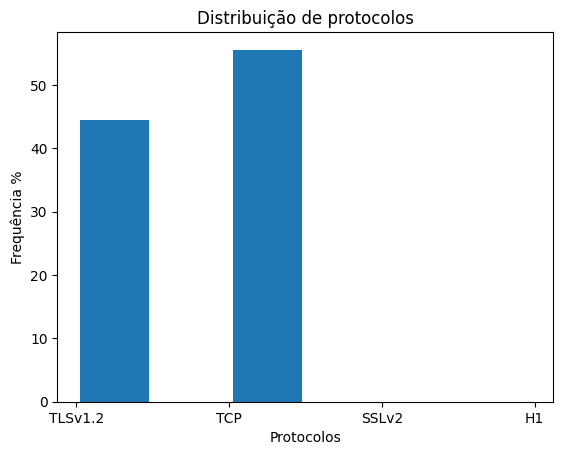

In [4]:
#histograma com a frequencia de protocolos para tráfego de multimídia
prot_midia = df_midia.Protocol
plt.title('Distribuição de protocolos')
plt.xlabel('Protocolos')
plt.ylabel('Frequência %')

plt.hist(prot_midia , bins=6, weights=np.ones_like(prot_midia) / len(prot_midia) * 100, rwidth=0.9)
plt.show()

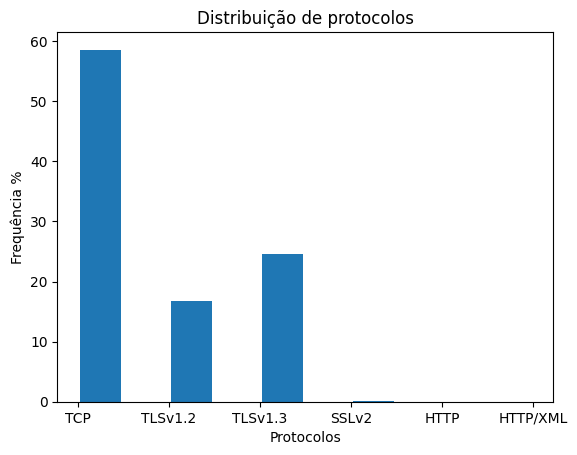

In [5]:
#histograma com a frequencia de protocolos para tráfego de dados em páginas web
prot_pag = df_pag.Protocol
plt.title('Distribuição de protocolos')
plt.xlabel('Protocolos')
plt.ylabel('Frequência %')

plt.hist(prot_pag, bins=10, weights=np.ones_like(prot_pag) / len(prot_pag) * 100, rwidth=0.9)
plt.show()

In [6]:
#obtenção dos valores absolutos de cada protocolo
from collections import Counter
freq_midia = Counter(prot_midia)
freq_pag = Counter(prot_pag)
print("Distribuição para dados multimídia: ", freq_midia) 
print("Distribuição para dados em página web: ", freq_pag)

Distribuição para dados multimídia:  Counter({'TCP': 1903724, 'TLSv1.2': 1523509, 'SSLv2': 17, 'H1': 2})
Distribuição para dados em página web:  Counter({'TCP': 156712, 'TLSv1.3': 65807, 'TLSv1.2': 44869, 'SSLv2': 147, 'HTTP': 81, 'HTTP/XML': 1})


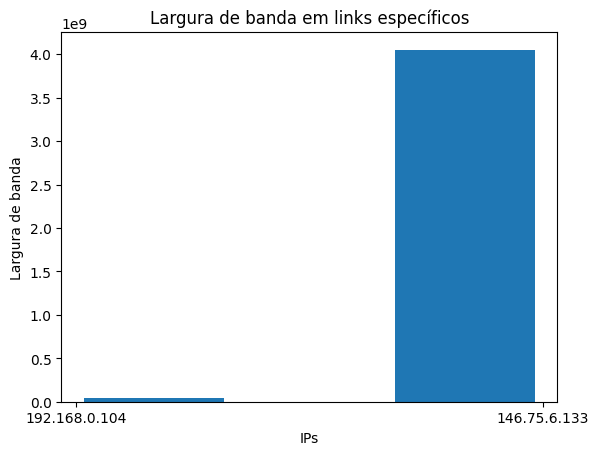

192.168.0.104:  40955595.0
146.75.6.133:  4052492809.0


In [7]:
#largura de banda em links específicos (multimídia).
larg_midia = df_midia.Source
plt.title('Largura de banda em links específicos')
plt.xlabel('IPs')
plt.ylabel('Largura de banda')

n, bins, patches = plt.hist(larg_midia, bins=3, weights=df_midia.Length, rwidth=0.9)
plt.show()
print("192.168.0.104: ", n[0])
print("146.75.6.133: ", n[2])

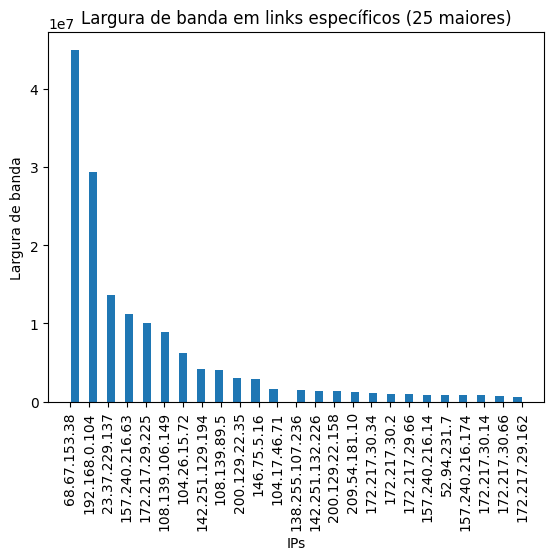

{'68.67.153.38': 45014062, '192.168.0.104': 29299480, '23.37.229.137': 13601806, '157.240.216.63': 11171271, '172.217.29.225': 10030614, '108.139.106.149': 8839029, '104.26.15.72': 6208204, '142.251.129.194': 4171039, '108.139.89.5': 4043042, '200.129.22.35': 2977049, '146.75.5.16': 2947086, '104.17.46.71': 1613838, '138.255.107.236': 1476059, '142.251.132.226': 1348588, '200.129.22.158': 1347878, '209.54.181.10': 1244432, '172.217.30.34': 1076863, '172.217.30.2': 1005556, '172.217.29.66': 982522, '157.240.216.14': 867798, '52.94.231.7': 828778, '157.240.216.174': 798571, '172.217.30.14': 786057, '172.217.30.66': 776783, '172.217.29.162': 645254}


In [8]:
# função para obter as n maiores larguras de banda monitoradas
def PrimeirosLinks(pesos, elementos, n):
    weighted_counts = {}
    weights = pesos
    
    for i, value in enumerate(elementos):
        if value in weighted_counts:
            weighted_counts[value] += weights[i]
        else:
            weighted_counts[value] = weights[i]
            
    weighted_counts = dict(sorted(weighted_counts.items(), key=lambda item: item[1], reverse=True))
    weighted_counts = dict(list(weighted_counts.items())[:n])
    return weighted_counts



#largura de banda em links específicos (os 25 maiores para páginas web).
larg_pag = PrimeirosLinks(df_pag.Length,df_pag.Source, 25)
plt.title('Largura de banda em links específicos (25 maiores)')
plt.xlabel('IPs')
plt.ylabel('Largura de banda')

plt.hist(list(larg_pag.keys()), bins=50, weights=list(larg_pag.values()), rwidth=0.9)
plt.xticks(rotation='vertical')
plt.show()
print(larg_pag)

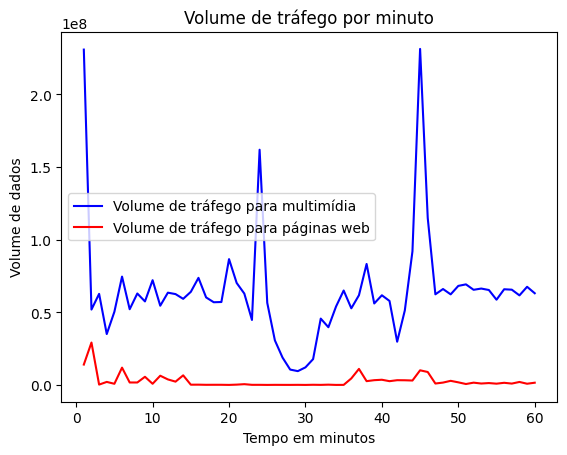

In [9]:
#Volume de Tráfego a cada minuto

#função para obtenção da quantidade de dados por minuto (tempo: vetor contendo os segundos, 
#dados: vetor contendo o volume de dados de cada entrada, ciclos: quantidade total de minutos analisados)
def volume(tempo, dados, ciclos):
    VT = []
    k = 0
    for i in range(ciclos):        
        auxp = 0
        while tempo[k] < (i+1)*60:            
            auxp += dados[k]
            k +=1
        VT.append(auxp)
    return VT

vol_midia = volume(df_midia.Time, df_midia.Length, 60)
vol_pag = volume(df_pag.Time, df_pag.Length, 60)
tempo = list(range(1, 61))
plt.plot(tempo, vol_midia, linestyle='-', color='b', label='Volume de tráfego para multimídia')
plt.plot(tempo, vol_pag, linestyle='-', color='r', label='Volume de tráfego para páginas web')
plt.title('Volume de tráfego por minuto')
plt.xlabel('Tempo em minutos')
plt.ylabel('Volume de dados')
plt.legend()
plt.show()

In [10]:
print("Volume total de trafego para multimídia: ", sum(df_midia.Length))
print("Volume total de trafego para páginas web: ", sum(df_pag.Length))

Volume total de trafego para multimídia:  4093448404
Volume total de trafego para páginas web:  176230705


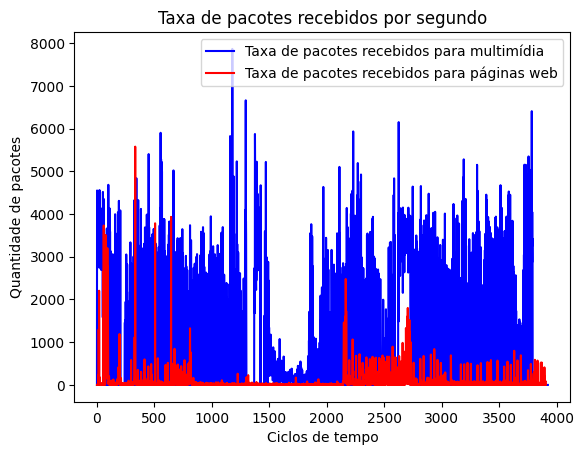

In [11]:
#Taxa de Pacotes Recebidos

#função para obtenção taxa de pacotes recebidos (tempo: vetor contendo os segundos, 
#ciclos: quantidade  de segundos utilizados para criação da taxa)
def taxa(tempo):
    QP = []    
    k = 0
   
    for i in range(int(max(tempo))):
        pacotes = 0        
                    
        while tempo[k] <= i:
            pacotes += 1
            k += 1
        QP.append(pacotes)    
        
    return QP
    

TaxP_midia = taxa(df_midia.Time)
TaxP_pag = taxa(df_pag.Time)


plt.plot(list(range(0, len(TaxP_midia))), TaxP_midia, linestyle='-', color='b', label='Taxa de pacotes recebidos para multimídia')
plt.plot(list(range(0, len(TaxP_pag))), TaxP_pag, linestyle='-', color='r', label='Taxa de pacotes recebidos para páginas web')
plt.title('Taxa de pacotes recebidos por segundo')
plt.xlabel('Ciclos de tempo')
plt.ylabel('Quantidade de pacotes')
plt.legend()
plt.show()


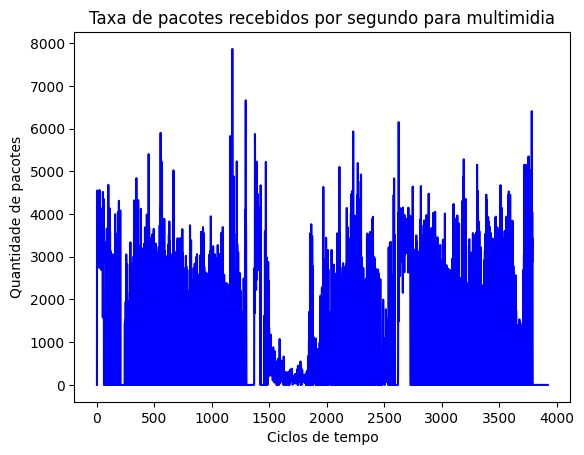

In [12]:
plt.plot(list(range(0, len(TaxP_midia))), TaxP_midia, linestyle='-', color='b', label='Taxa de pacotes recebidos para multimídia')
plt.title('Taxa de pacotes recebidos por segundo para multimidia')
plt.xlabel('Ciclos de tempo')
plt.ylabel('Quantidade de pacotes')
plt.show()


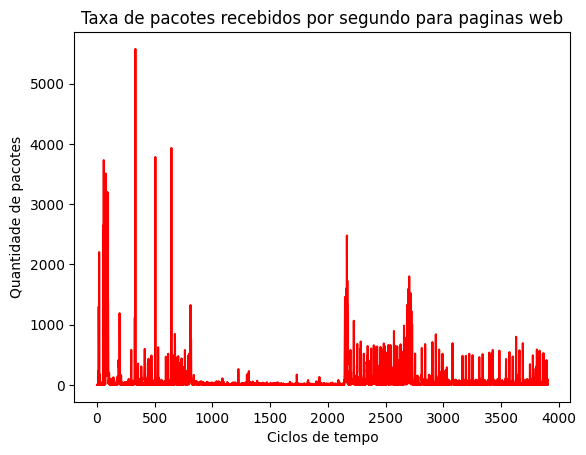

In [13]:
plt.plot(list(range(0, len(TaxP_pag))), TaxP_pag, linestyle='-', color='r', label='Taxa de pacotes recebidos para multimídia')
plt.title('Taxa de pacotes recebidos por segundo para paginas web')
plt.xlabel('Ciclos de tempo')
plt.ylabel('Quantidade de pacotes')
plt.show()

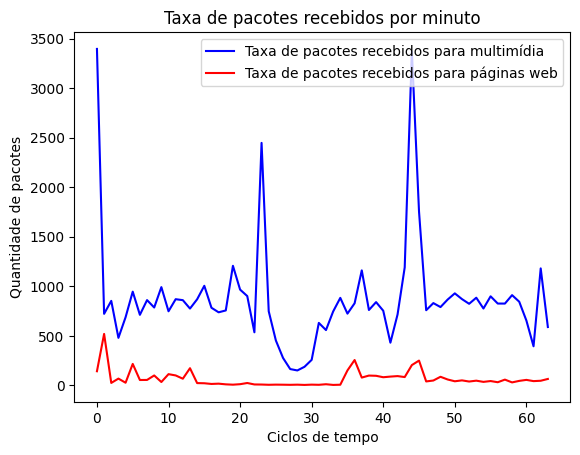

In [14]:
k = 0
taxa=[]
for i in range(int(len(TaxP_midia)/60)-1):
    sum = 0
    while (k+1)%60 != 0:
        sum += TaxP_midia[k]
        k += 1
    k += 1
    taxa.append(sum/60)
    
    

plt.plot(list(range(0, len(taxa))), taxa, linestyle='-', color='b', label='Taxa de pacotes recebidos para multimídia')

k = 0
taxa=[]
for i in range(int(len(TaxP_pag)/60)-1):
    sum = 0
    while (k+1)%60 != 0:
        sum += TaxP_pag[k]
        k += 1
    k += 1
    taxa.append(sum/60)
    
plt.plot(list(range(0, len(taxa))), taxa, linestyle='-', color='r', label='Taxa de pacotes recebidos para páginas web')
plt.title('Taxa de pacotes recebidos por minuto')
plt.xlabel('Ciclos de tempo')
plt.ylabel('Quantidade de pacotes')
plt.legend()
plt.show()